# Seatwork 10.1 Case Study: Improving RT-IoT2022 Analysis

### Preprocessing Dataset

#### Extract

In [192]:
# extract dataset and import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
IoT = pd.read_csv('datasets/RT_IOT2022.csv')

In [193]:
# check for duplicate values
IoT.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
123112    False
123113    False
123114    False
123115    False
123116    False
Length: 123117, dtype: bool

In [194]:
# check for missing values
IoT.isna().sum()

no                      0
id.orig_p               0
id.resp_p               0
proto                   0
service                 0
                       ..
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Attack_type             0
Length: 85, dtype: int64

#### Transform

In [195]:
# I'll filter the dataset so that I can only see the columns I'll need for MY analysis.
IoT.columns

Index(['no', 'id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
  

In [196]:
IOT_filtered = IoT[
                    ['no',
                     'id.orig_p',
                     'id.resp_p',
                     'proto',
                     'service',
                     'flow_duration',
                     'Attack_type',
                     'fwd_pkts_per_sec',
                     'bwd_pkts_per_sec',
                     'payload_bytes_per_second',
                     'fwd_iat.avg',
                     'bwd_iat.avg',
                     'flow_SYN_flag_count',
                     'flow_RST_flag_count',
                     'fwd_PSH_flag_count'
                    ]
                ]
IOT_filtered.dtypes

no                            int64
id.orig_p                     int64
id.resp_p                     int64
proto                        object
service                      object
flow_duration               float64
Attack_type                  object
fwd_pkts_per_sec            float64
bwd_pkts_per_sec            float64
payload_bytes_per_second    float64
fwd_iat.avg                 float64
bwd_iat.avg                 float64
flow_SYN_flag_count           int64
flow_RST_flag_count           int64
fwd_PSH_flag_count            int64
dtype: object

Change data types for those with dtype = object. <br>
'proto', 'service', and 'Attack_type' are categorical <br>
I can use a dictionary to change them all at once <br>
[Reference](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html)

In [197]:
IOT_filtered_1 = IOT_filtered.astype({
                    'proto':'category',
                    'service':'category',
                    'Attack_type':'category'
                    })
IOT_filtered_1.dtypes

no                             int64
id.orig_p                      int64
id.resp_p                      int64
proto                       category
service                     category
flow_duration                float64
Attack_type                 category
fwd_pkts_per_sec             float64
bwd_pkts_per_sec             float64
payload_bytes_per_second     float64
fwd_iat.avg                  float64
bwd_iat.avg                  float64
flow_SYN_flag_count            int64
flow_RST_flag_count            int64
fwd_PSH_flag_count             int64
dtype: object

#### Load

I'll analyze the dataset by each Attack_type to delve into trends within each type. <br>
But first, I need to group each entry based on Attack_type, <br>
so for 1 Attack_type, there would be 1 dataframe created.

Identify what the Attack types are in the first place. <br>
I can also count how many entries per category. Two birds, one stone. <br>
[Reference](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html)

In [198]:
IOT_filtered_1.value_counts(subset = 'Attack_type', normalize = False)

Attack_type
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

##### Now, we can make dataframes for each Attack_type category

I discovered that aside from using df.query, you can also use [this](https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values):<br>
df.query seems easier to remember though

In [259]:
#for DOS_SYN_Hping
ATK1 = IOT_filtered_1.loc[IOT_filtered_1['Attack_type'] == 'DOS_SYN_Hping']

In [200]:
#for DDOS_Slowloris 
ATK9 = IOT_filtered_1.query(' Attack_type == "DDOS_Slowloris" ')

In [201]:
#for Wipro_bulb 
ATK10 = IOT_filtered_1.query(' Attack_type == "Wipro_bulb" ')

In [202]:
#for Metasploit_Brute_Force_SSH 
ATK11 = IOT_filtered_1.query(' Attack_type == "Metasploit_Brute_Force_SSH" ')

In [203]:
#for NMAP_FIN_SCAN
ATK12 = IOT_filtered_1.query(' Attack_type == "NMAP_FIN_SCAN" ')

### What is the distribution of the Attack_type classes (normal vs. various attacks), and what percentage of the 123,117 instances does each class comprise?

References<br>
[value_counts for a column](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)<br>
[value_counts for a dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html)<br>
[making a new dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)<br>

In [229]:
# the normalize parameter dictates whether proportions or frequencies will be returned.
Frequency = IOT_filtered_1.value_counts(subset = 'Attack_type', normalize = False) #show frequencies
Percentage = IOT_filtered_1["Attack_type"].value_counts(normalize=True) * 100 #show proportions (like they are parts of a pie)

# create a new dataframe, showing the Frequency and Percentage as columns
dist = pd.DataFrame({
                    "Frequency": Frequency,
                    "Percentage(%)": Percentage
                    }
                   )

#Reset index so 'Attack_type' becomes a column instead of the index
dist = dist.reset_index()
dist.columns = ['Attack_type', 'Frequency', 'Percentage(%)']
dist.head(12)

,Attack_type,Frequency,Percentage(%)
0,DOS_SYN_Hping,94659,76.885402
1,Thing_Speak,8108,6.585606
2,ARP_poisioning,7750,6.294825
3,MQTT_Publish,4146,3.367528
4,NMAP_UDP_SCAN,2590,2.103690
5,NMAP_XMAS_TREE_SCAN,2010,1.632593
6,NMAP_OS_DETECTION,2000,1.624471
7,NMAP_TCP_scan,1002,0.813860
8,DDOS_Slowloris,534,0.433734
9,Wipro_bulb,253,0.205496


In [239]:
# Get the last 4 rows
least_common = dist.tail(4)

# Step 2: Calculate total percentage
total = dist['Frequency'].sum()
least_common_percentage_sum = (least_common['Frequency'].sum() / total) * 100

# Step 3: Print the result
print(f"Total percentage of the 4 least common attack types: {least_common_percentage_sum:.2f}%")


Total percentage of the 4 least common attack types: 0.69%


We can represent this with a pie chart

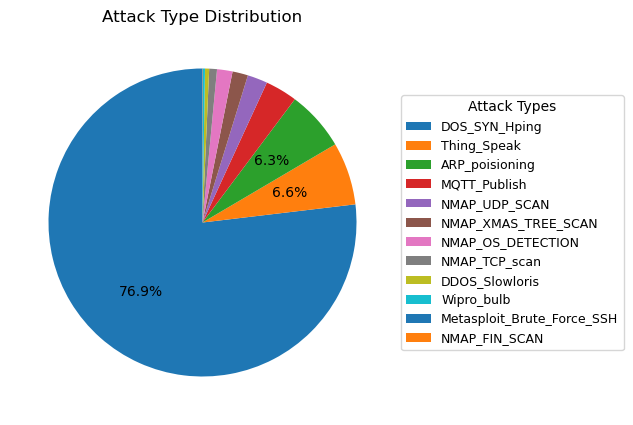

In [242]:
import matplotlib.pyplot as plt

# Sort and get the top 3 frequencies
top3_indices = dist['Frequency'].nlargest(3).index.tolist()

# Convert frequencies to list
frequencies = dist['Frequency'].tolist()

# Compute percentages
total = sum(frequencies)
percentages = [(f / total) * 100 for f in frequencies]

# Create autopct labels: only top 3 get labels
autopct_labels = [f"{p:.1f}%" if i in top3_indices else "" for i, p in enumerate(percentages)]

# Plot
fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(
    frequencies,
    startangle=90,
    labels=None,
    autopct=lambda pct: autopct_labels.pop(0)  # Use precomputed list
)

# Add legend
ax.legend(dist['Attack_type'],
          title="Attack Types",
          loc="center left",
          bbox_to_anchor=(1, 0.5),
          fontsize=9)

# Title
ax.set_title('Attack Type Distribution')

# Show
plt.show()


### How do the categorical features proto (protocol) and service vary across different attack types and normal traffic patterns?

#### "service"

In [254]:
ATK9['service'].value_counts()

service
http      523
-           6
dns         3
dhcp        2
irc         0
mqtt        0
ntp         0
radius      0
ssh         0
ssl         0
Name: count, dtype: int64

In [255]:
ATK10['service'].value_counts()

service
ssl       107
dns        53
-          45
irc        43
dhcp        5
http        0
mqtt        0
ntp         0
radius      0
ssh         0
Name: count, dtype: int64

In [256]:
ATK11['service'].value_counts()

service
ssh       28
dns        8
http       1
-          0
dhcp       0
irc        0
mqtt       0
ntp        0
radius     0
ssl        0
Name: count, dtype: int64

In [257]:
ATK12['service'].value_counts()

service
-         24
dns        3
http       1
dhcp       0
irc        0
mqtt       0
ntp        0
radius     0
ssh        0
ssl        0
Name: count, dtype: int64

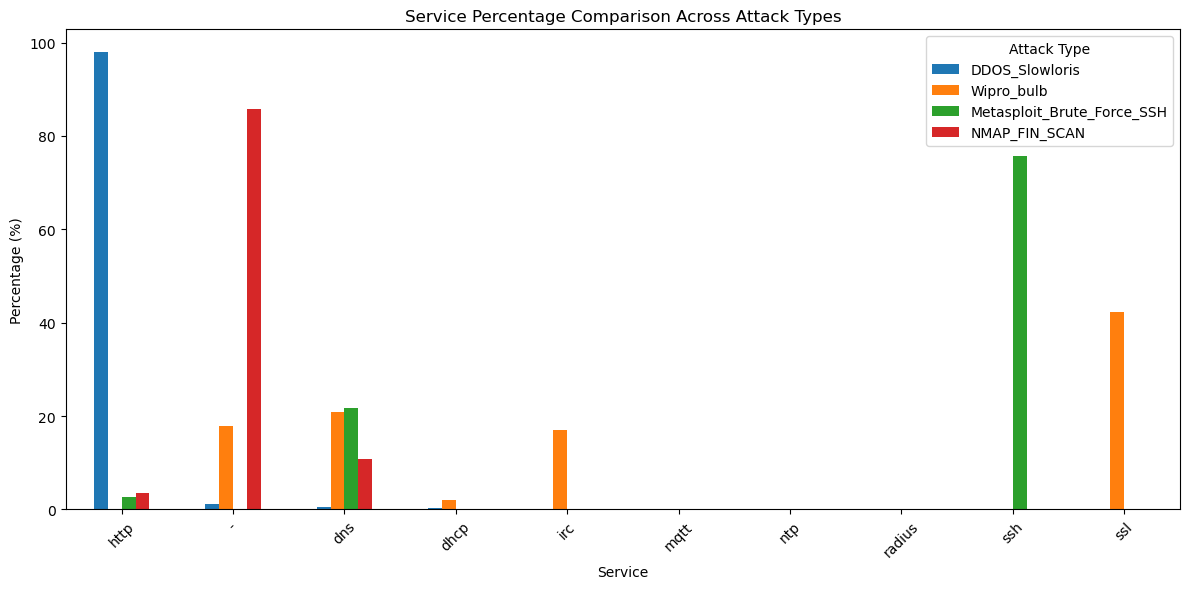

In [261]:
# Get value_counts as percentages
atk9_perc = ATK9['service'].value_counts(normalize=True).rename('DDOS_Slowloris') * 100
atk10_perc = ATK10['service'].value_counts(normalize=True).rename('Wipro_bulb') * 100
atk11_perc = ATK11['service'].value_counts(normalize=True).rename('Metasploit_Brute_Force_SSH') * 100
atk12_perc = ATK12['service'].value_counts(normalize=True).rename('NMAP_FIN_SCAN') * 100

# Combine into one DataFrame
combined_percentages = pd.concat([atk9_perc, atk10_perc, atk11_perc, atk12_perc], axis=1).fillna(0)

# Plot
combined_percentages.plot(kind='bar', figsize=(12, 6))
plt.title('Service Percentage Comparison Across Attack Types')
plt.xlabel('Service')
plt.ylabel('Percentage (%)')
plt.legend(title='Attack Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### "proto"

In [249]:
ATK9['proto'].value_counts()

proto
tcp     529
udp       5
icmp      0
Name: count, dtype: int64

In [250]:
ATK10['proto'].value_counts()

proto
tcp     182
udp      69
icmp      2
Name: count, dtype: int64

In [251]:
ATK11['proto'].value_counts()

proto
tcp     29
udp      8
icmp     0
Name: count, dtype: int64

In [252]:
ATK12['proto'].value_counts()

proto
tcp     25
udp      3
icmp     0
Name: count, dtype: int64

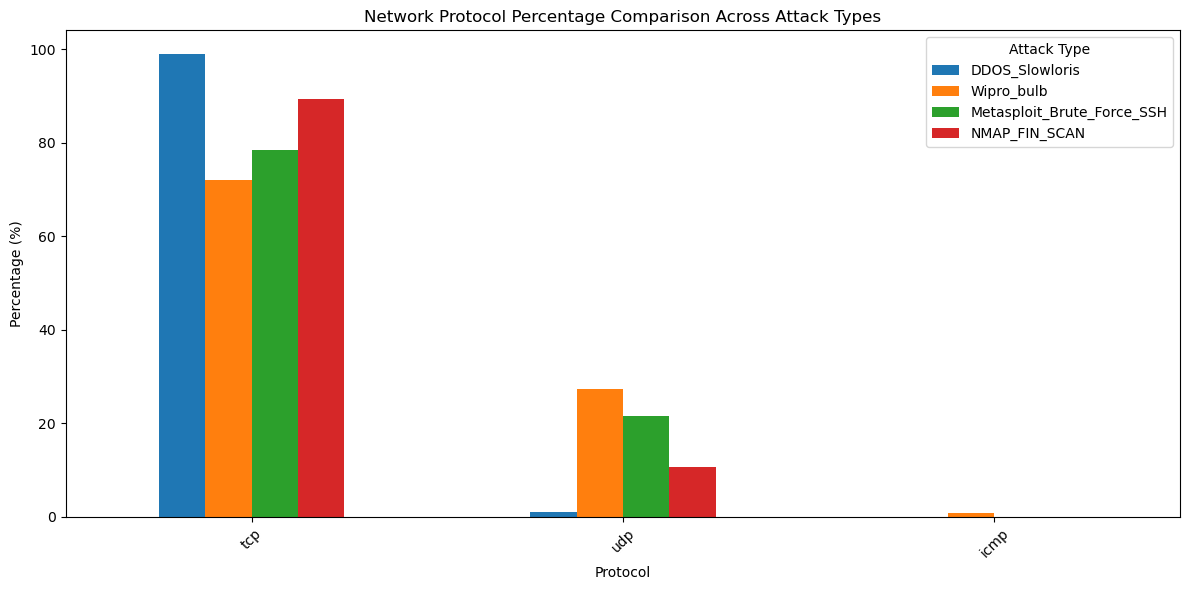

In [262]:
# Get value_counts as percentages
atk9_perc = ATK9['proto'].value_counts(normalize=True).rename('DDOS_Slowloris') * 100
atk10_perc = ATK10['proto'].value_counts(normalize=True).rename('Wipro_bulb') * 100
atk11_perc = ATK11['proto'].value_counts(normalize=True).rename('Metasploit_Brute_Force_SSH') * 100
atk12_perc = ATK12['proto'].value_counts(normalize=True).rename('NMAP_FIN_SCAN') * 100

# Combine into one DataFrame
combined_percentages = pd.concat([atk9_perc, atk10_perc, atk11_perc, atk12_perc], axis=1).fillna(0)

# Plot
combined_percentages.plot(kind='bar', figsize=(12, 6))
plt.title('Network Protocol Percentage Comparison Across Attack Types')
plt.xlabel('Protocol')
plt.ylabel('Percentage (%)')
plt.legend(title='Attack Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### What are the mean and standard deviation of flow_duration for each Attack_type, and are differences statistically significant?

In [206]:
# run .mean and .stdev

I'll only analyze the Attack_types that occurred less than 1000 times.

#### for DDOS_Slowloris 

In [207]:
print("DDOS_Slowloris")
mean = ATK9['flow_duration'].mean()
median = ATK9['flow_duration'].median()
stdev = ATK9['flow_duration'].std()

Skewness = 3*(mean - median) / stdev
print("Skewness = ", Skewness)

ATK9['flow_duration'].describe()

DDOS_Slowloris
Skewness =  -1.1447559217527645


count    534.000000
mean      14.699148
std       14.124797
min        0.000000
25%        0.003817
50%       20.088963
75%       30.557698
max       30.870463
Name: flow_duration, dtype: float64

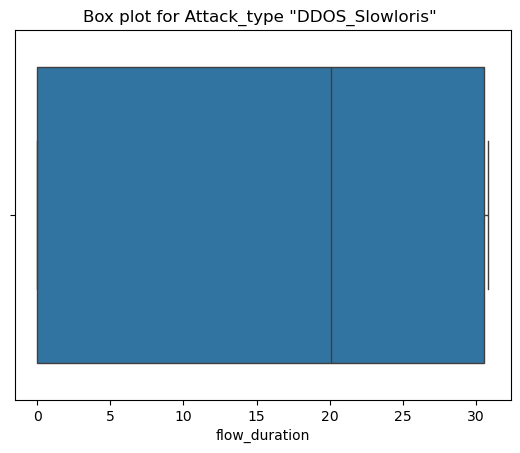

In [208]:
sns.boxplot(data=ATK9, x = 'flow_duration')
plt.title('Box plot for Attack_type "DDOS_Slowloris" ' )
plt.show()

Box plot shows no outliers. <br>
No need to filter the dataframe.

#### for Wipro_bulb

In [210]:
print("Wipro_bulb")
mean = ATK10['flow_duration'].mean()
median = ATK10['flow_duration'].median()
stdev = ATK10['flow_duration'].std()

kewness = 3*(mean - median) / stdev
print("Skewness = ", Skewness)

ATK10['flow_duration'].describe()

Wipro_bulb
Skewness =  -1.1447559217527645


count      253.000000
mean       586.845727
std       2738.891637
min          0.000000
25%          0.027666
50%          0.803326
75%         31.285402
max      21728.335578
Name: flow_duration, dtype: float64

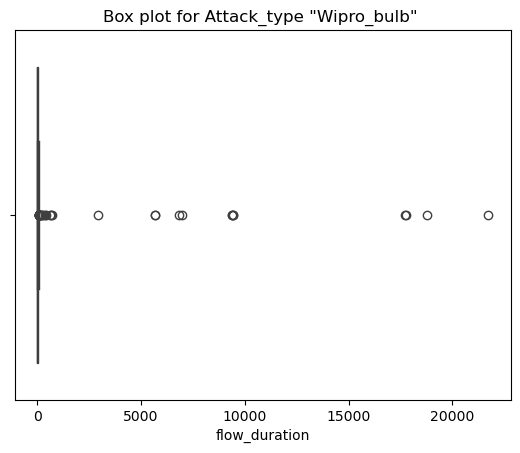

In [211]:
sns.boxplot(data=ATK10, x = 'flow_duration')
plt.title('Box plot for Attack_type "Wipro_bulb" ' )
plt.show()

The dataframe is slgihtly skewed positively<br>
The box plot also shows that a number of outliers affect the mean and consequently, the standard deviation.

In [212]:
# Flagging outliers using IQR
# I'll use this method to weed out the outliers since the data points are slightly skewed
Q1 = ATK10['flow_duration'].quantile(0.25)
Q3 = ATK10['flow_duration'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
""" If the value is 
    less than the first quartile minus 1.5 times the Interquartile range or 
    greater than the 3rd quartile plus 1.5 times the Interquartile range, 
    they're considered an outlier
    References I've read used 1.5, so I also used it. ^_^
""" 
outliers = (ATK10['flow_duration'] < (Q1 - 1.5* IQR)) | (ATK10['flow_duration'] > (Q3 + 1.5*  IQR))

# Check the flagged outliers
outliers.value_counts()

flow_duration
False    221
True      32
Name: count, dtype: int64

Let's make a dataframe that has less of these outliers

In [213]:
ATK10_no_outliers = ATK10[~outliers]  # Negate the outliers to keep non-outliers
print("Wipro_bulb | less outliers")
mean = ATK10_no_outliers['flow_duration'].mean()
median = ATK10_no_outliers['flow_duration'].median()
stdev = ATK10_no_outliers['flow_duration'].std()

Skewness = 3*(mean - median) / stdev
print("Skewness = ", Skewness)

ATK10_no_outliers['flow_duration'].describe()

Wipro_bulb | less outliers
Skewness =  1.459505897397956


count    221.000000
mean      10.370136
std       19.959788
min        0.000000
25%        0.021565
50%        0.659660
75%        4.182818
max       78.044458
Name: flow_duration, dtype: float64

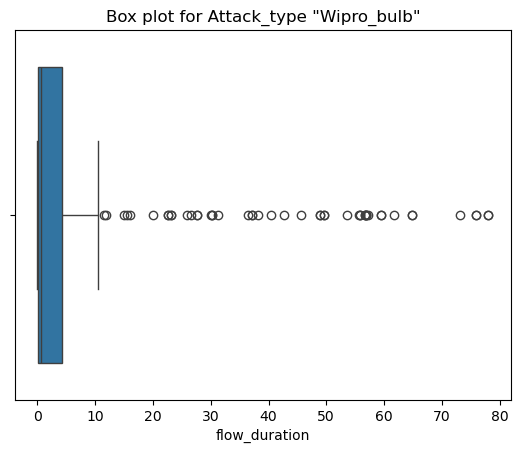

In [214]:
sns.boxplot(data=ATK10_no_outliers, x = 'flow_duration')
plt.title('Box plot for Attack_type "Wipro_bulb"' )
plt.show()

#### for Metasploit_Brute_Force_SSH 

In [215]:
print("Metasploit_Brute_Force_SSH ")
mean = ATK11['flow_duration'].mean()
median = ATK11['flow_duration'].median()
stdev = ATK11['flow_duration'].std()

kewness = 3*(mean - median) / stdev
print("Skewness = ", Skewness)

ATK11['flow_duration'].describe()

Metasploit_Brute_Force_SSH 
Skewness =  1.459505897397956


count    37.000000
mean      3.006557
std       5.210286
min       0.000000
25%       1.417588
50%       2.030317
75%       2.258765
max      29.289262
Name: flow_duration, dtype: float64

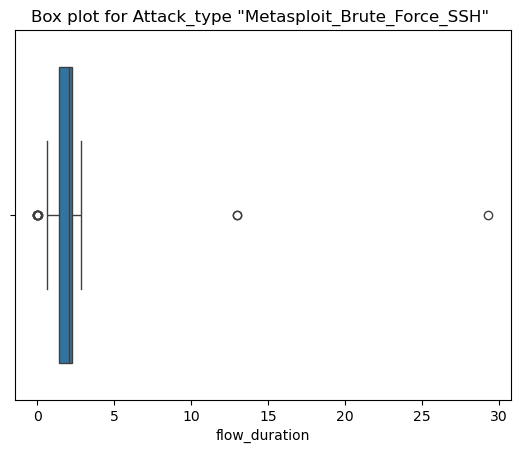

In [216]:
sns.boxplot(data=ATK11, x = 'flow_duration')
plt.title('Box plot for Attack_type "Metasploit_Brute_Force_SSH" ' )
plt.show()

The dataframe is skewed positively<br>
The box plot also shows that a number of outliers affect the mean and consequently, the standard deviation.

In [217]:
# Flagging outliers using IQR
# I'll use this method to weed out the outliers since the data points are slightly skewed
Q1 = ATK11['flow_duration'].quantile(0.25)
Q3 = ATK11['flow_duration'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
""" If the value is 
    less than the first quartile minus 1.5 times the Interquartile range or 
    greater than the 3rd quartile plus 1.5 times the Interquartile range, 
    they're considered an outlier
    References I've read used 1.5, so I also used it. ^_^
""" 
outliers = (ATK11['flow_duration'] < (Q1 - 1.5* IQR)) | (ATK11['flow_duration'] > (Q3 + 1.5*  IQR))

# Check the flagged outliers
outliers.value_counts()

flow_duration
False    28
True      9
Name: count, dtype: int64

In [218]:
ATK11_no_outliers = ATK11[~outliers]  # Negate the outliers to keep non-outliers
print("Wipro_bulb | less outliers")
mean = ATK11_no_outliers['flow_duration'].mean()
median = ATK11_no_outliers['flow_duration'].median()
stdev = ATK11_no_outliers['flow_duration'].std()

Skewness = 3*(mean - median) / stdev
print("Skewness = ", Skewness)

ATK11_no_outliers['flow_duration'].describe()

Wipro_bulb | less outliers
Skewness =  -0.3868506068156085


count    28.000000
mean      1.999530
std       0.508938
min       0.633988
25%       1.607395
50%       2.065157
75%       2.242271
max       2.861502
Name: flow_duration, dtype: float64

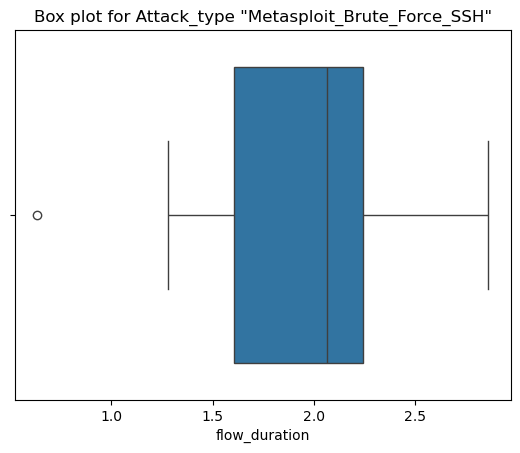

In [219]:
sns.boxplot(data=ATK11_no_outliers, x = 'flow_duration')
plt.title('Box plot for Attack_type "Metasploit_Brute_Force_SSH"' )
plt.show()

#### for NMAP_FIN_SCAN

In [220]:
print("NMAP_FIN_SCAN")
mean = ATK12['flow_duration'].mean()
median = ATK12['flow_duration'].median()
stdev = ATK12['flow_duration'].std()

kewness = 3*(mean - median) / stdev
print("Skewness = ", Skewness)

ATK12['flow_duration'].describe()

NMAP_FIN_SCAN
Skewness =  -0.3868506068156085


count    28.000000
mean      0.023614
std       0.108791
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       0.575884
Name: flow_duration, dtype: float64

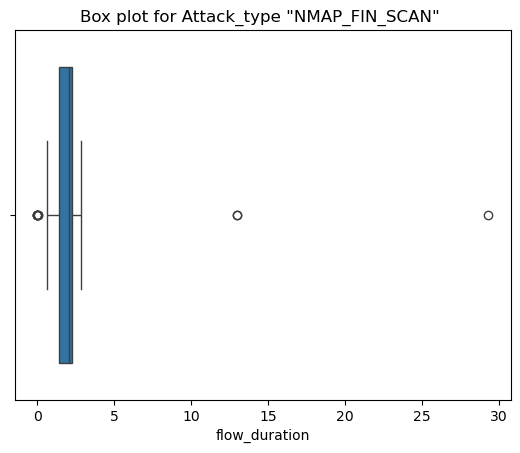

In [221]:
sns.boxplot(data=ATK11, x = 'flow_duration')
plt.title('Box plot for Attack_type "NMAP_FIN_SCAN" ' )
plt.show()

The dataframe is slightly skewed negatively<br>
The box plot also shows that a number of outliers affect the mean and consequently, the standard deviation.
However, the quartiles are 0, so filtering by using the IQR is not possible.

Now that the mean and standard deviation for the selected attack types have been determined, I think we can graph them now to visualize their differences.

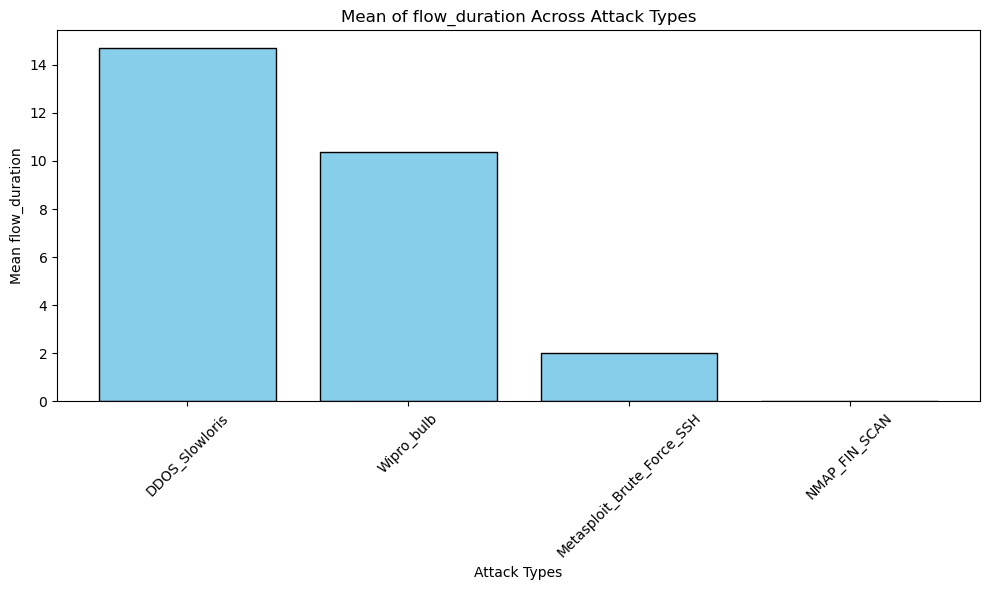

In [264]:
#plotting the mean amongst the 4 attack types
import matplotlib.pyplot as plt

# Calculate means for flow_duration in each dataframe
means = [
    ATK9['flow_duration'].mean(),
    ATK10_no_outliers['flow_duration'].mean(),
    ATK11_no_outliers['flow_duration'].mean(),
    ATK12['flow_duration'].mean()
]

# Names of the attack types
attack_types = ['DDOS_Slowloris', 'Wipro_bulb', 'Metasploit_Brute_Force_SSH', 'NMAP_FIN_SCAN']

# Create the plot for means
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(attack_types, means, color='skyblue', edgecolor='black')
ax.set_title('Mean of flow_duration Across Attack Types')
ax.set_xlabel('Attack Types')
ax.set_ylabel('Mean flow_duration')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


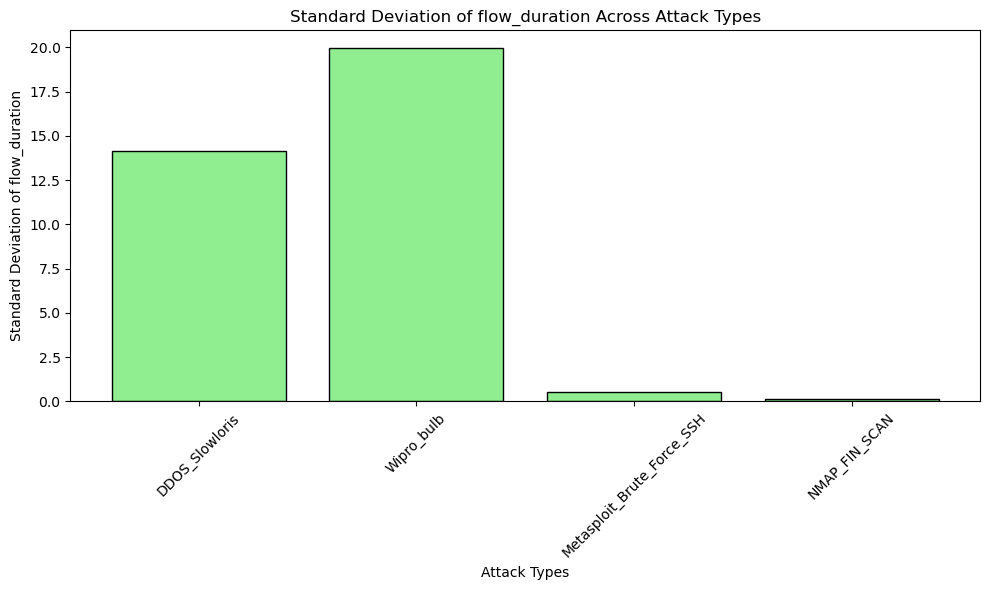

In [265]:
#plotting the stdev amongst the 4 attack types
import matplotlib.pyplot as plt

# Calculate standard deviations for flow_duration in each dataframe
stdevs = [
    ATK9['flow_duration'].std(),
    ATK10_no_outliers['flow_duration'].std(),
    ATK11_no_outliers['flow_duration'].std(),
    ATK12['flow_duration'].std()
]

# Names of the attack types
attack_types = ['DDOS_Slowloris', 'Wipro_bulb', 'Metasploit_Brute_Force_SSH', 'NMAP_FIN_SCAN']

# Create the plot for standard deviations
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(attack_types, stdevs, color='lightgreen', edgecolor='black')
ax.set_title('Standard Deviation of flow_duration Across Attack Types')
ax.set_xlabel('Attack Types')
ax.set_ylabel('Standard Deviation of flow_duration')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Which continuous features (e.g., fwd_pkts_per_sec, bwd_pkts_per_sec, payload_bytes_per_second) exhibit the highest correlation with specific attack classes?

### How do time‑based features like fwd_iat.avg and bwd_iat.avg (mean inter‑arrival times) differ between various attack types and normal traffic?

### Which network flag counts (e.g., flow_SYN_flag_count, flow_RST_flag_count, fwd_PSH_flag_count) are most indicative of specific intrusion patterns?